In [ ]:
%pylab inline
%load_ext autoreload
%autoreload 2
# from IPython.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # Load the scaled features
# csv_path = "/home/ryan.zurrin001/Projects/omama/_EXPERIMENTS/CS438/labels/scaled_df.csv"
# features = pd.read_csv(csv_path)

# # Separate the features and target label
# X = features.drop('target_label', axis=1)
# y = features['target_label']

# # Split the data into training, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [3]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
features = features.drop(columns=['label', 'score', 'coords1', 'coords2', 'coords3', 'coords4',
       'resized_coords1', 'resized_coords2', 'resized_coords3',
       'resized_coords4'])

In [4]:
csv_path = "/home/ryan.zurrin001/Projects/omama/_EXPERIMENTS/CS438/labels/scaled_df.csv"

In [5]:
features = pd.read_csv(csv_path)

In [6]:
features

,ImageLaterality,PatientAge,Manufacturer,ManufacturerModelName,DistanceSourceToDetector,DistanceSourceToPatient,ExposureTime,XRayTubeCurrent,Exposure,ExposureInuAs,...,histogram_percentile_75,flattened_image_mean,flattened_image_median,flattened_image_std,flattened_image_min,flattened_image_max,flattened_image_percentile_25,flattened_image_percentile_50,flattened_image_percentile_75,target_label
0,0.997740,-1.043664,-0.282386,0.947632,-0.073214,0.281058,-0.735180,-0.476663,-0.896860,-0.911028,...,-0.801928,-0.141674,-0.257536,0.453604,-0.237151,-0.087892,0.021801,-0.257536,0.724471,1
1,-1.002265,-0.007688,-0.282386,0.411425,-0.073214,0.281058,0.251884,-0.535434,-0.012056,-0.021162,...,-0.620968,1.666368,-0.432808,1.798547,-0.237151,0.238795,-0.635702,-0.432808,1.050953,1
2,0.997740,-0.643563,-0.282386,0.947632,-0.073214,0.281058,-0.081410,-0.476663,-0.338037,-0.323996,...,-0.179880,0.069887,-0.082264,0.278232,-0.237151,0.810499,0.788889,-0.082264,0.679950,1
3,-1.002265,2.007106,-0.282386,0.411425,-0.073214,0.281058,0.716573,-0.476663,0.407061,0.398147,...,-0.507869,-0.224262,-0.432808,-0.074365,-0.237151,-1.149627,-0.635702,-0.432808,0.249587,1
4,0.997740,0.399558,-0.282386,-0.124781,-0.073214,0.281058,0.338412,-0.476663,0.034512,0.053382,...,1.471374,1.026247,3.022560,0.046609,-0.237151,-3.109753,-0.087783,3.022560,0.353468,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161294,-1.002265,0.835382,-0.282386,0.411425,-0.073214,0.281058,0.181379,-0.535434,-0.105194,-0.086387,...,-0.790618,-0.242355,-0.257536,-0.147270,-0.237151,-1.231299,0.021801,-0.257536,0.397988,1
161295,-1.002265,0.135205,-0.282386,-0.124781,-0.073214,0.281058,1.152420,-0.594206,0.686473,0.673027,...,-0.349529,0.581506,-0.432808,0.938523,-0.237151,0.157123,-0.635702,-0.432808,0.665110,1
161296,0.997740,0.728212,-0.282386,0.411425,-0.073214,0.281058,0.203813,-0.476663,-0.058625,-0.067751,...,-0.168570,-0.636085,-0.307614,-0.334069,-0.237151,0.238795,-0.197367,-0.307614,0.175387,1
161297,-1.002265,-1.715261,-0.282386,0.411425,-0.073214,0.281058,0.341617,-0.535434,0.081081,0.058041,...,-0.824548,-0.372357,-0.382730,0.945744,-0.237151,0.565483,-0.526119,-0.382730,-0.789220,1


In [7]:
# Separate the features and target label
X = features.drop('target_label', axis=1)
y = features['target_label']

In [8]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [25]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model
log_reg.fit(X_train, y_train)

# Validate the model
y_val_pred = log_reg.predict(X_val)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.70      0.48      0.57      3322
           1       0.94      0.98      0.96     28938

    accuracy                           0.93     32260
   macro avg       0.82      0.73      0.76     32260
weighted avg       0.92      0.93      0.92     32260



In [11]:
# Print the first 10 predictions
print(y_val_pred[:1000])


[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 

In [15]:
# Compare the first 10 actual labels with the predicted labels
for actual, predicted in zip(y_val[:100], y_val_pred[:100]):
    print(f"Actual: {actual}, Predicted: {predicted}")


Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predi

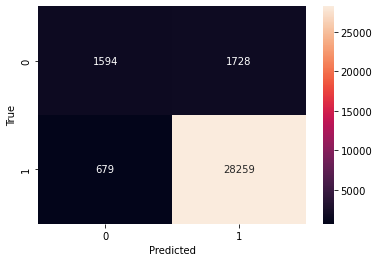

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [17]:
# Get probability estimates
probabilities = log_reg.predict_proba(X_val)

# Print the first 10 probability estimates
print(probabilities[:10])


[[0.00887332 0.99112668]
 [0.00592216 0.99407784]
 [0.02235653 0.97764347]
 [0.11266523 0.88733477]
 [0.0074359  0.9925641 ]
 [0.10864169 0.89135831]
 [0.01343131 0.98656869]
 [0.03091339 0.96908661]
 [0.01214506 0.98785494]
 [0.01331512 0.98668488]]


In [18]:
# Find misclassified examples
misclassified = y_val != y_val_pred
X_val_misclassified = X_val[misclassified]
y_val_misclassified = y_val[misclassified]

# Print some of the misclassified examples
print("Misclassified examples:")
print(X_val_misclassified[:10])


Misclassified examples:
        ImageLaterality  PatientAge  Manufacturer  ManufacturerModelName  \
86589          0.997740   -0.007688     -0.282386               0.947632   
160931         0.997740    0.699633      3.738321              -3.163284   
135318        -1.002265    1.106879     -0.282386               0.411425   
38064         -1.002265    0.863960     -0.282386              -0.124781   
131207        -1.002265   -0.407789     -0.282386              -0.124781   
45956          0.997740   -0.500669     -0.282386               0.411425   
154677         0.997740    0.985420     -0.282386              -0.124781   
125033        -1.002265    1.992816     -0.282386              -0.124781   
34304          0.997740    0.478149     -0.282386               0.411425   
94653          0.997740   -0.572116     -0.282386               0.411425   

        DistanceSourceToDetector  DistanceSourceToPatient  ExposureTime  \
86589                  -0.073214                 0.281058      0

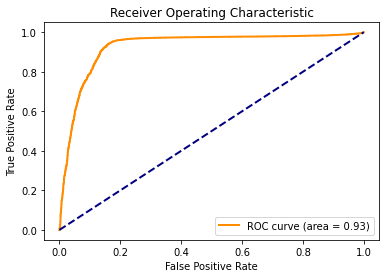

In [19]:
from sklearn.metrics import roc_curve, auc

y_prob = log_reg.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


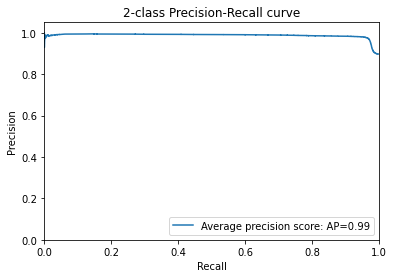

In [20]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_val, y_prob)

precision, recall, _ = precision_recall_curve(y_val, y_prob)

plt.step(recall, precision, where='post', label='Average precision score: AP={0:0.2f}'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.legend(loc="lower right")
plt.show()


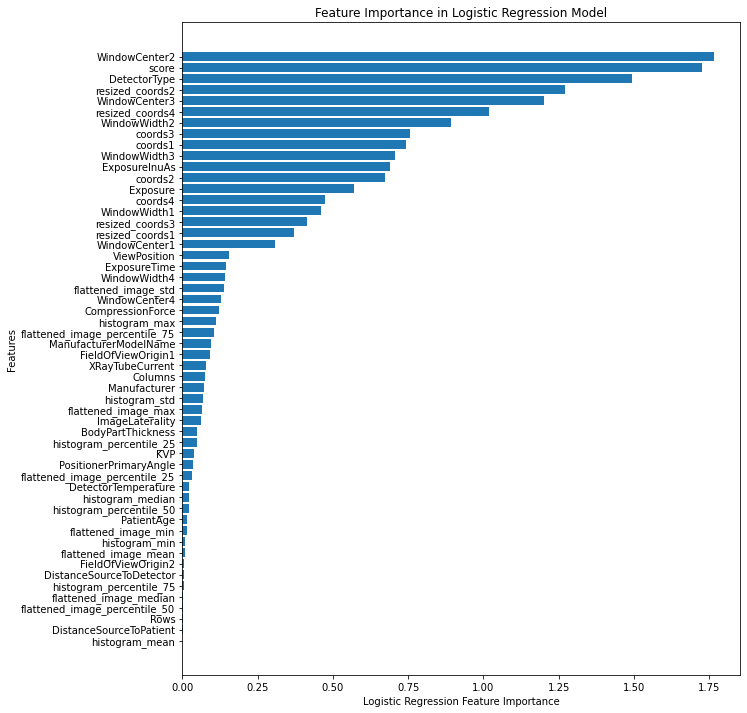

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming log_reg is your trained Logistic Regression model
feature_importance = abs(log_reg.coef_[0])
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 12))  # You can adjust the dimensions (width, height) as needed
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X_train.columns[i] for i in sorted_idx])
plt.xlabel('Logistic Regression Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()



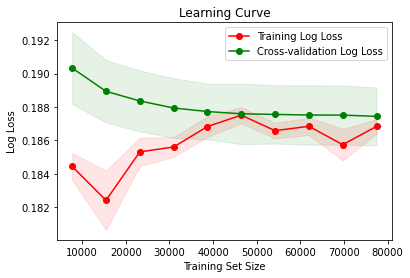

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Define the range of training sizes and the number of folds for cross-validation
train_sizes = np.linspace(0.1, 1.0, 10)
n_jobs = -1 # Use all available cores

train_sizes, train_scores, validation_scores = learning_curve(
    log_reg, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='neg_log_loss', n_jobs=n_jobs)

# Calculate mean and standard deviation for training set scores
train_mean = -np.mean(train_scores, axis=1)  # Note the negative sign
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for validation set scores
validation_mean = -np.mean(validation_scores, axis=1)  # Note the negative sign
validation_std = np.std(validation_scores, axis=1)

# Plot the learning curve
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, validation_mean - validation_std,
                 validation_mean + validation_std, color="g", alpha=0.1)

plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Log Loss")
plt.plot(train_sizes, validation_mean, 'o-', color="g", label="Cross-validation Log Loss")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Log Loss")
plt.legend(loc="best")
plt.show()


In [27]:
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [23]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Initialize alternative models
svm_model = SVC(probability=True)
# neural_net = MLPClassifier()

# Fit alternative models
# Note: These models have their own hyperparameters that you can tune
svm_model.fit(X_train, y_train)
# neural_net.fit(X_train, y_train)

# Validate alternative models
# Evaluate their performance and compare with the logistic regression model


SVC(probability=True)

In [27]:
# Validate the model
y_val_pred_svm = svm_model.predict(X_val)
print(classification_report(y_val, y_val_pred_svm))

              precision    recall  f1-score   support

           0       0.76      0.62      0.68      3322
           1       0.96      0.98      0.97     28938

    accuracy                           0.94     32260
   macro avg       0.86      0.80      0.82     32260
weighted avg       0.94      0.94      0.94     32260



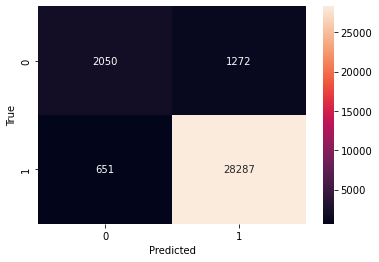

In [28]:
# Generate the confusion matrix
cm_svm = confusion_matrix(y_val, y_val_pred_svm)

# Plot the confusion matrix
sns.heatmap(cm_svm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

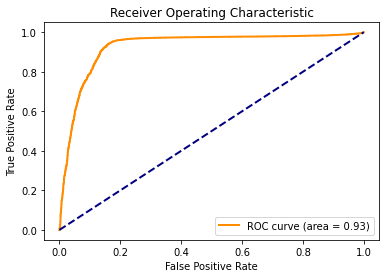

In [29]:
y_prob_svm = log_reg.predict_proba(X_val)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_val, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


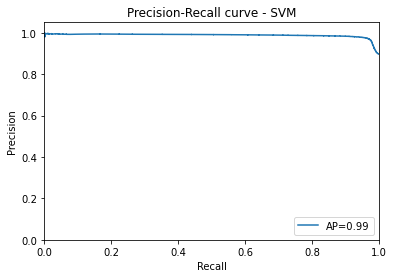

In [31]:
# Precision-Recall Curve
average_precision_svm = average_precision_score(y_val, y_proba_svm)
precision_svm, recall_svm, _ = precision_recall_curve(y_val, y_proba_svm)

plt.step(recall_svm, precision_svm, where='post', label='AP={0:0.2f}'.format(average_precision_svm))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve - SVM')
plt.legend(loc="lower right")
plt.show()

In [32]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Predict on the validation or test set
y_pred_log_reg = log_reg.predict(X_val)  # Assuming log_reg is your logistic regression model
y_pred_svm = svm_model.predict(X_val)    # svm_model is your trained SVC model

# Calculate the probabilities for ROC AUC score
y_proba_log_reg = log_reg.predict_proba(X_val)[:, 1]  # Logistic Regression probabilities
y_proba_svm = svm_model.predict_proba(X_val)[:, 1]    # SVC probabilities

# Classification reports
print("Logistic Regression Classification Report:")
print(classification_report(y_val, y_pred_log_reg))

print("\nSVC Classification Report:")
print(classification_report(y_val, y_pred_svm))

# ROC AUC scores
roc_auc_log_reg = roc_auc_score(y_val, y_proba_log_reg)
roc_auc_svm = roc_auc_score(y_val, y_proba_svm)

print(f"Logistic Regression ROC AUC Score: {roc_auc_log_reg}")
print(f"SVC ROC AUC Score: {roc_auc_svm}")

# Compare models
print("\nModel Comparison:")
print(f"{'Metric':<15} {'Logistic Regression':<20} {'SVC':<10}")
print(f"{'Accuracy':<15} {accuracy_score(y_val, y_pred_log_reg):<20} {accuracy_score(y_val, y_pred_svm):<10}")
print(f"{'Precision':<15} {precision_score(y_val, y_pred_log_reg):<20} {precision_score(y_val, y_pred_svm):<10}")
print(f"{'Recall':<15} {recall_score(y_val, y_pred_log_reg):<20} {recall_score(y_val, y_pred_svm):<10}")
print(f"{'F1 Score':<15} {f1_score(y_val, y_pred_log_reg):<20} {f1_score(y_val, y_pred_svm):<10}")
print(f"{'ROC AUC Score':<15} {roc_auc_log_reg:<20} {roc_auc_svm:<10}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.48      0.57      3322
           1       0.94      0.98      0.96     28938

    accuracy                           0.93     32260
   macro avg       0.82      0.73      0.76     32260
weighted avg       0.92      0.93      0.92     32260


SVC Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.62      0.68      3322
           1       0.96      0.98      0.97     28938

    accuracy                           0.94     32260
   macro avg       0.86      0.80      0.82     32260
weighted avg       0.94      0.94      0.94     32260

Logistic Regression ROC AUC Score: 0.9257140460439224
SVC ROC AUC Score: 0.9288263591962205

Model Comparison:
Metric          Logistic Regression  SVC       
Accuracy        0.9253874767513949   0.940390576565406
Precision       0.942375029179311    0.9569674210900233
Recal

/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


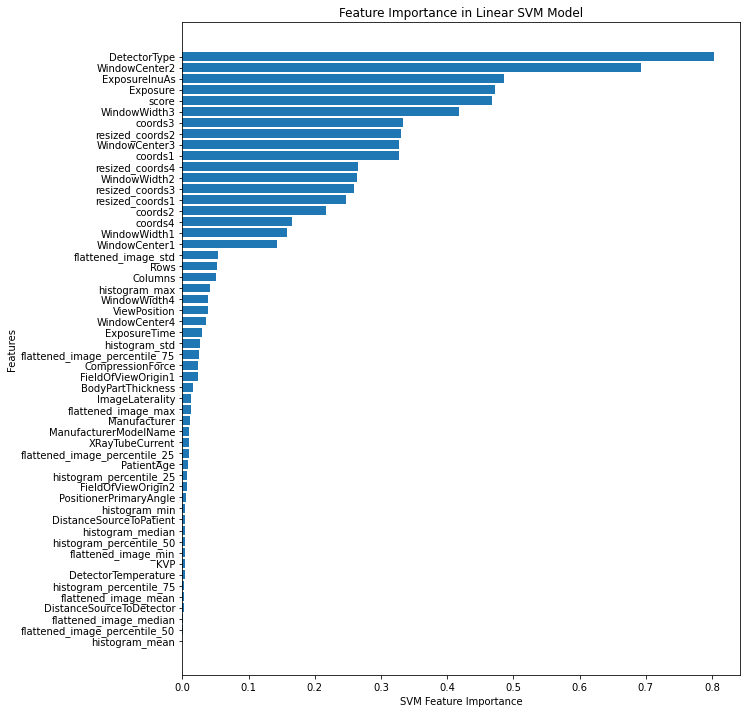

In [33]:
from sklearn.svm import LinearSVC

# Initialize the Linear SVM model
linear_svm = LinearSVC(max_iter=10000)

# Fit the model
linear_svm.fit(X_train, y_train)

# Get the feature importance
feature_importance_svm = abs(linear_svm.coef_[0])
sorted_idx_svm = np.argsort(feature_importance_svm)

# Visualize the feature importance
plt.figure(figsize=(10, 12))
plt.barh(range(len(sorted_idx_svm)), feature_importance_svm[sorted_idx_svm], align='center')
plt.yticks(range(len(sorted_idx_svm)), [X_train.columns[i] for i in sorted_idx_svm])
plt.xlabel('SVM Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Linear SVM Model')
plt.show()


/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1

/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1

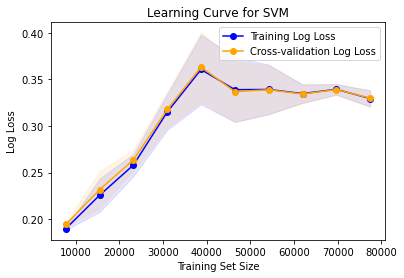

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve

# Initialize the SVC model
svm_model = SVC(kernel='linear', probability=True, max_iter=10000)

# Define the range of training sizes and the number of folds for cross-validation
train_sizes = np.linspace(0.1, 1.0, 10)
n_jobs = -1  # Use all available cores

train_sizes, train_scores, validation_scores = learning_curve(
    svm_model, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='neg_log_loss', n_jobs=n_jobs)

# Calculate mean and standard deviation for training set scores
train_mean = -np.mean(train_scores, axis=1)  # Note the negative sign
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for validation set scores
validation_mean = -np.mean(validation_scores, axis=1)  # Note the negative sign
validation_std = np.std(validation_scores, axis=1)

# Plot the learning curve
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, color="blue", alpha=0.1)
plt.fill_between(train_sizes, validation_mean - validation_std,
                 validation_mean + validation_std, color="orange", alpha=0.1)

plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Log Loss")
plt.plot(train_sizes, validation_mean, 'o-', color="orange", label="Cross-validation Log Loss")

plt.title("Learning Curve for SVM")
plt.xlabel("Training Set Size")
plt.ylabel("Log Loss")
plt.legend(loc="best")
plt.show()


In [ ]:
# Initialize alternative models
neural_net = MLPClassifier()

# Fit alternative models
# Note: These models have their own hyperparameters that you can tune
neural_net.fit(X_train, y_train)
